### Importing Libraries

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

### Obtaining the path of the Images which has to be pre-processed

In [2]:
data_dir = "E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images"

In [3]:
data_dir

'E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images'

### Performing Image pre-processing

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images')

In [5]:
num = list(data_dir.glob("train/*"))
PIL.Image.open(str(num[0]))

In [6]:
img = cv2.imread(str(num[0]))
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [7]:
import pandas as pd
labels = pd.read_csv("E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/train.csv")
labels.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [8]:
y = labels.drop(columns = ['filename'])
y = np.array(y)

In [9]:
y=y.reshape(-1)
y

array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

In [10]:
len(list(data_dir.glob("train/*")))

49000

In [11]:
X = []
num = list(data_dir.glob("train/*"))
num

[WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/0.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/1.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/10.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/100.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/1000.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/10000.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/10001.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/10002.png'),
 WindowsPath('E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Train_UQcUa52/Images/train/10003.png'

In [12]:
for i in range(len(list(data_dir.glob("train/*")))):
    img = cv2.imread(str(num[i]))
    X.append(img)

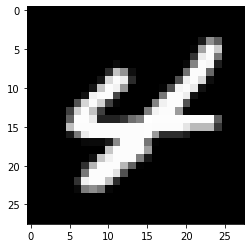

In [13]:
plt.imshow(X[0])

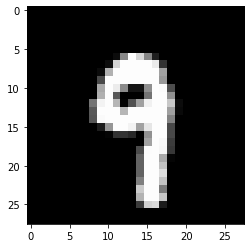

In [14]:
plt.imshow(X[1])

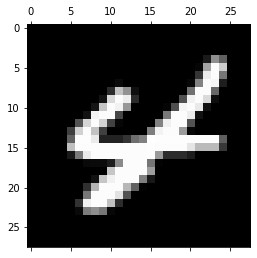

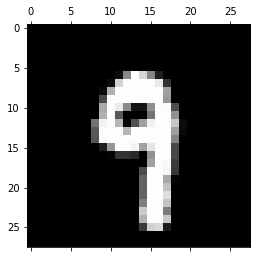

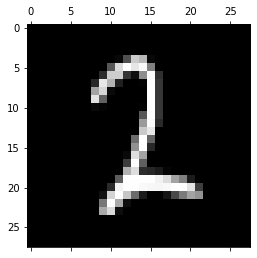

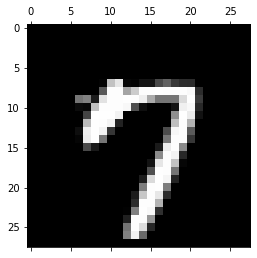

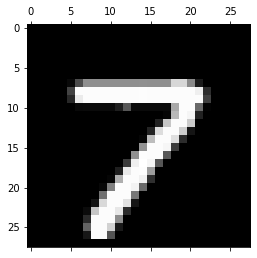

In [15]:
for i in range(5):
    plt.matshow(X[i])

In [16]:
str(num[0]).split("train\\")[1].split(".")[0]

'0'

In [17]:
lst=[]
for x in num:
    lst.append(int(str(x).split("train\\")[1].split(".")[0]))

In [18]:
lst

[0,
 1,
 10,
 100,
 1000,
 10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 1001,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 1002,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 1003,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 1004,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 1005,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 1006,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 1007,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 1008,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 1009,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 101,
 1010,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 1011,
 10110,
 10

In [19]:
df=pd.DataFrame({"no.":lst,"col":num}).sort_values(by="no.")

In [20]:
df["target"]=y

In [21]:
pd.set_option("display.max_colwidth", -1)
df

C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,no.,col,target
0,0,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\0.png,4
1,1,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\1.png,9
11112,2,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\2.png,1
22223,3,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\3.png,7
33334,4,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\4.png,3
...,...,...,...
43329,48995,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\48995.png,2
43330,48996,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\48996.png,4
43331,48997,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\48997.png,9
43332,48998,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\train\48998.png,3


In [22]:
df=df.set_index("no.")

In [23]:
X=[]
for i in range(len(df)):
    img = cv2.imread(str(df.col[i]))
    X.append(img)

In [24]:
X

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [25]:
X = np.array(X)
X = X/255
X.shape

(49000, 28, 28, 3)

In [26]:
y

array([4, 9, 1, ..., 9, 3, 0], dtype=int64)

### Making a CNN model


model = models.Sequential([
    # (Feature Extraction)
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    # (Classification)
    
    layers.Flatten(),
    layers.Dense(2000, activation = 'relu'),
    layers.Dense(800, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X, y, epochs = 2)

In [66]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation("softmax"))
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )
model.fit(X, y, epochs = 5)

Epoch 1/5
1532/1532 [==============================] - 248s 145ms/step - loss: 0.0916 - accuracy: 0.9708
Epoch 2/5
1532/1532 [==============================] - 220s 144ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 3/5
1532/1532 [==============================] - 220s 143ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 4/5
1532/1532 [==============================] - 219s 143ms/step - loss: 0.0297 - accuracy: 0.9905
Epoch 5/5
1532/1532 [==============================] - 221s 144ms/step - loss: 0.0201 - accuracy: 0.9936


### Making predictions on the Test Data-Set

In [48]:
num = list(data_dir.glob("test/*"))
PIL.Image.open(str(num[0]))

In [49]:
import pandas as pd
labels = pd.read_csv("E:/Programs/Python Programs/Deep Learning/Analytics Vidhya/Test_fCbTej3_0j1gHmj.csv")
labels.head()

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [45]:
len(list(data_dir.glob("test/*")))

21000

In [44]:
str(num[0])

'E:\\Programs\\Python Programs\\Deep Learning\\Analytics Vidhya\\Train_UQcUa52\\Images\\test\\49000.png'

In [43]:
str(num[0]).split("test\\")[1].split(".")[0]

'49000'

In [50]:
lst=[]
for x in num:
    lst.append(int(str(x).split("test\\")[1].split(".")[0]))

In [51]:
lst

[49000,
 49001,
 49002,
 49003,
 49004,
 49005,
 49006,
 49007,
 49008,
 49009,
 49010,
 49011,
 49012,
 49013,
 49014,
 49015,
 49016,
 49017,
 49018,
 49019,
 49020,
 49021,
 49022,
 49023,
 49024,
 49025,
 49026,
 49027,
 49028,
 49029,
 49030,
 49031,
 49032,
 49033,
 49034,
 49035,
 49036,
 49037,
 49038,
 49039,
 49040,
 49041,
 49042,
 49043,
 49044,
 49045,
 49046,
 49047,
 49048,
 49049,
 49050,
 49051,
 49052,
 49053,
 49054,
 49055,
 49056,
 49057,
 49058,
 49059,
 49060,
 49061,
 49062,
 49063,
 49064,
 49065,
 49066,
 49067,
 49068,
 49069,
 49070,
 49071,
 49072,
 49073,
 49074,
 49075,
 49076,
 49077,
 49078,
 49079,
 49080,
 49081,
 49082,
 49083,
 49084,
 49085,
 49086,
 49087,
 49088,
 49089,
 49090,
 49091,
 49092,
 49093,
 49094,
 49095,
 49096,
 49097,
 49098,
 49099,
 49100,
 49101,
 49102,
 49103,
 49104,
 49105,
 49106,
 49107,
 49108,
 49109,
 49110,
 49111,
 49112,
 49113,
 49114,
 49115,
 49116,
 49117,
 49118,
 49119,
 49120,
 49121,
 49122,
 49123,
 49124,


In [52]:
df=pd.DataFrame({"no.":lst,"col":num}).sort_values(by="no.")

In [53]:
df

,no.,col
0,49000,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\49000.png
1,49001,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\49001.png
2,49002,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\49002.png
3,49003,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\49003.png
4,49004,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\49004.png
...,...,...
20995,69995,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\69995.png
20996,69996,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\69996.png
20997,69997,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\69997.png
20998,69998,E:\Programs\Python Programs\Deep Learning\Analytics Vidhya\Train_UQcUa52\Images\test\69998.png


In [54]:
X_test=[]
for i in range(len(df)):
    img = cv2.imread(str(df.col[i]))
    X_test.append(img)

In [55]:
np.array(X_test).shape

(21000, 28, 28, 3)

In [56]:
X_test = np.array(X_test)
X_test = X_test/255
X_test.shape

(21000, 28, 28, 3)

In [67]:
y_pred=model.predict(X_test)

In [68]:
np.argmax(y_pred[0])

4

In [69]:
np.argmax(y_pred[1])

0

In [70]:
np.argmax(y_pred[3])

7

In [71]:
y_pred=[np.argmax(y_pred[i]) for i in range(len(y_pred))]

In [63]:
y_pred

[4,
 0,
 9,
 7,
 9,
 6,
 6,
 9,
 0,
 4,
 2,
 8,
 4,
 6,
 1,
 2,
 9,
 6,
 1,
 4,
 0,
 8,
 4,
 3,
 7,
 7,
 5,
 1,
 6,
 4,
 1,
 1,
 2,
 7,
 1,
 8,
 0,
 3,
 2,
 4,
 3,
 1,
 8,
 7,
 9,
 7,
 3,
 5,
 0,
 0,
 2,
 5,
 6,
 5,
 1,
 7,
 2,
 6,
 7,
 5,
 9,
 3,
 9,
 4,
 3,
 1,
 6,
 1,
 2,
 2,
 5,
 9,
 3,
 0,
 2,
 2,
 1,
 3,
 5,
 4,
 7,
 5,
 4,
 7,
 8,
 6,
 6,
 8,
 6,
 3,
 5,
 5,
 5,
 3,
 6,
 9,
 7,
 6,
 9,
 3,
 9,
 2,
 4,
 6,
 2,
 1,
 3,
 5,
 1,
 3,
 2,
 1,
 1,
 0,
 5,
 9,
 4,
 5,
 2,
 1,
 5,
 8,
 9,
 9,
 9,
 0,
 6,
 4,
 8,
 6,
 3,
 4,
 5,
 4,
 6,
 6,
 6,
 7,
 2,
 0,
 1,
 2,
 8,
 8,
 2,
 7,
 0,
 6,
 2,
 5,
 8,
 2,
 6,
 9,
 8,
 1,
 1,
 1,
 8,
 1,
 0,
 0,
 5,
 8,
 6,
 3,
 4,
 0,
 4,
 1,
 7,
 5,
 7,
 4,
 2,
 4,
 1,
 8,
 1,
 7,
 1,
 2,
 0,
 8,
 0,
 8,
 5,
 5,
 0,
 9,
 9,
 5,
 9,
 5,
 6,
 0,
 4,
 2,
 1,
 4,
 3,
 7,
 2,
 5,
 1,
 0,
 9,
 7,
 1,
 5,
 8,
 3,
 2,
 3,
 8,
 5,
 3,
 9,
 4,
 5,
 3,
 1,
 1,
 1,
 0,
 8,
 0,
 4,
 0,
 2,
 5,
 9,
 9,
 1,
 7,
 4,
 4,
 1,
 0,
 4,
 3,
 1,
 3,
 8,
 9,
 5,
 6,
 8,
 0,
 6,


In [72]:
labels["label"]=y_pred

In [74]:
labels.to_csv("Sample_Submission.csv")